In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import io
from scipy.stats import norm
from scipy.stats import multivariate_normal


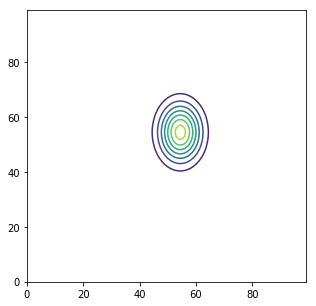

In [2]:
#2 Isocontours of Normal Distributions
#a
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X,Y = np.meshgrid(x,y)
pos = np.array([X.flatten(),Y.flatten()]).T

rv = multivariate_normal(mean = [1, 1], cov = [[1, 0], [0, 2]])
fig= plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.contour(rv.pdf(pos).reshape(100,100));

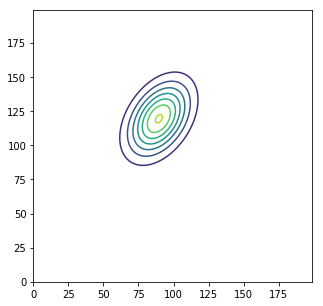

In [3]:
#b
x = np.linspace(-10,10,200)
y = np.linspace(-10,10,200)
X,Y = np.meshgrid(x,y)
pos = np.array([X.flatten(),Y.flatten()]).T

rv = multivariate_normal(mean = [-1, 2], cov = [[2, 1], [1, 3]])
fig= plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.contour(rv.pdf(pos).reshape(200,200));

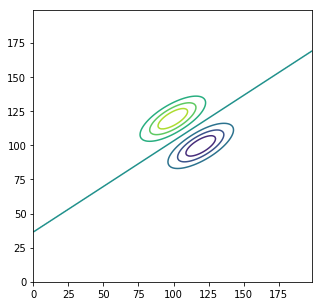

In [4]:
#c
x = np.linspace(-10,10,200)
y = np.linspace(-10,10,200)
X,Y = np.meshgrid(x,y)
pos = np.array([X.flatten(),Y.flatten()]).T

rv1 = multivariate_normal(mean = [0, 2], cov = [[2, 1], [1, 1]])
rv2 = multivariate_normal(mean = [2, 0], cov = [[2, 1], [1, 1]])
fig= plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.contour((rv1.pdf(pos)-rv2.pdf(pos)).reshape(200,200))

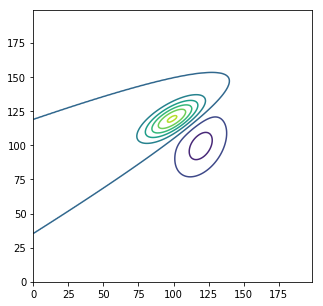

In [5]:
#d
x = np.linspace(-10,10,200)
y = np.linspace(-10,10,200)
X,Y = np.meshgrid(x,y)
pos = np.array([X.flatten(),Y.flatten()]).T

rv1 = multivariate_normal(mean = [0, 2], cov =[[2, 1], [1, 1]])
rv2 = multivariate_normal(mean = [2, 0],cov = [[2, 1], [1, 3]])
fig= plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.contour((rv1.pdf(pos)-rv2.pdf(pos)).reshape(200,200))



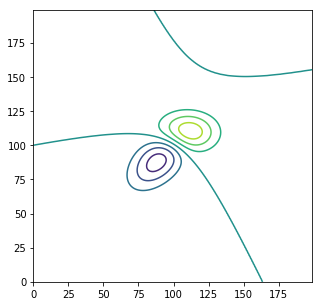

In [6]:
#e
x = np.linspace(-10,10,200)
y = np.linspace(-10,10,200)
X,Y = np.meshgrid(x,y)
pos = np.array([X.flatten(),Y.flatten()]).T

rv1 = multivariate_normal(mean = [1, 1], cov = [[2, 0], [0, 1]])
rv2 = multivariate_normal(mean = [-1, -1], cov =[[2, 1], [1, 2]])
fig= plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.contour((rv1.pdf(pos)-rv2.pdf(pos)).reshape(200,200))
#ax.contour(rv2.pdf(pos).reshape(200,200));



mean: [2.68846045 5.3888394 ]
covariant matrix: [[7.42292904 3.00253936]
 [3.00253936 4.78474509]]
eigvalues: [9.38335628 2.82431785]
eigvectors: [[ 0.83732346 -0.54670781]
 [ 0.54670781  0.83732346]]


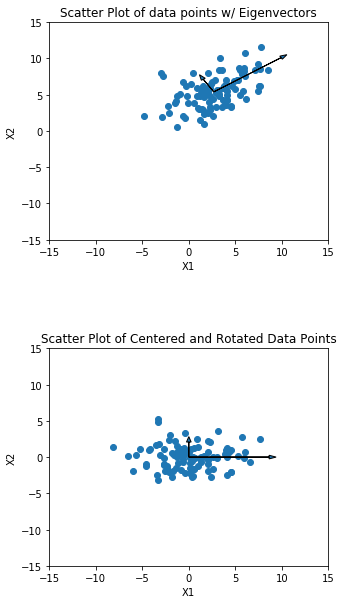

In [7]:
#3 Eigenvectors of Gaussian Covariance Matrix
np.random.seed(42)
x1 = np.random.normal(3,3,100)
x2 = .5*x1 + np.random.normal(4,2,100)
X = np.vstack((x1, x2)).T
#a Compute the mean of the sample
X_mean = np.mean(X, axis = 0)
print('mean: ' +str(X_mean))

#b Compute the 2x2 covariance matrix of the sample
cov_matrix = np.cov(X.T)
print('covariant matrix: ' + str(cov_matrix))

#c Compute the eigenvalues and eigenvectors of the covariance matrix
eigvalues, eigvectors = np.linalg.eig(cov_matrix)
print('eigvalues: ' + str(eigvalues))
print('eigvectors: ' + str(eigvectors))

#d Plot all of the n=100 data points with X1 on horizontal and X2 on vertical
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (5,10))
fig.subplots_adjust(hspace = .5)
ax1.scatter(x1,x2)
ax1.arrow(X_mean[0], X_mean[1], eigvectors[0][0]*eigvalues[0],
          eigvectors[1][0]*eigvalues[0],
        length_includes_head = True, head_width = .5)
ax1.arrow(X_mean[0], X_mean[1], eigvectors[0][1]*eigvalues[1],
          eigvectors[1][1]*eigvalues[1],
        length_includes_head = True, head_width = .5)
ax1.set_xlim([-15,15])
ax1.set_ylim([-15,15])
ax1.set_title('Scatter Plot of data points w/ Eigenvectors')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')

centered_pts = X - X_mean
rotated_pts = eigvectors.T.dot(centered_pts.T).T
ax2.scatter(rotated_pts[:,0], rotated_pts[:,1])
ax2.arrow(0, 0, eigvalues[0], 0,
          length_includes_head = True, head_width = .5)
ax2.arrow(0, 0, 0, eigvalues[1],
          length_includes_head = True, head_width = .5)
ax2.set_xlim([-15,15])
ax2.set_ylim([-15,15])
ax2.set_title('Scatter Plot of Centered and Rotated Data Points')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2');



In [33]:
mnist = io.loadmat("mnist-data/mnist_data.mat")
spam = io.loadmat("spam-data/spam_data.mat")
mnist_training = mnist["training_data"]
mnist_labels = mnist["training_labels"]
mnist_test = mnist['test_data']
spam_training = spam['training_data']
spam_labels = spam['training_labels']
spam_test = spam['test_data']

In [20]:
#7a Fit a gaussian distribution for each digit class using the maximum likelihood estimation
def normArr(arr):
    return arr/np.linalg.norm(arr)

def fit_gauss_dist(train, labels, norm):
    if norm:
        train = np.apply_along_axis(normArr, 1, train)
    meanLst, covLst = [], []
    class_labels = np.unique(labels)
    for cl in class_labels:
        index = np.where(labels == cl)[0]
        target_data = train[index]
        mean_cl = np.mean(target_data, axis = 0)
        sig_cl = np.cov(target_data, rowvar = False, bias = True)
        meanLst.append(mean_cl)
        covLst.append(sig_cl)
    meanArr = np.array(meanLst)
    covArr = np.array(covLst)
    return meanArr, covArr

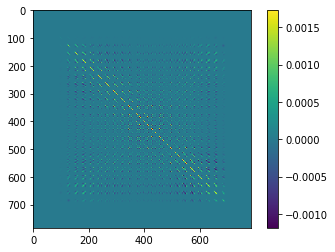

In [10]:
#7b Plot to show see the covariance matrix for sigma_0
sigma0 = fit_gauss_dist(mnist_training, mnist_labels, norm = True)[1][0]
plt.imshow(sigma0)
plt.colorbar();

In [11]:
#train-test split
def split(data, labels, val_size):
    np.random.seed(42)
    total_len = len(data)
    train_size = total_len - val_size
    rand_idx = np.random.permutation(total_len)
    tr_data = data[rand_idx][:train_size]
    tr_label = labels[rand_idx][:train_size]
    val_data = data[rand_idx][train_size:]
    val_label = labels[rand_idx][train_size:]
    print('Training Data Len: ' + str(len(tr_data)))
    print('Training Labels Len: ' + str(len(tr_label)))
    print('Validation Data Len: ' + str(len(val_data)))
    print('Validation Labels Len: ' + str(len(val_label)))
    return tr_data, tr_label, val_data, val_label

MnistTrdata, MnistTrlabel, MnistValdata, MnistVallabel = split(mnist_training,
                                            mnist_labels, 10000)

Training Data Len: 50000
Training Labels Len: 50000
Validation Data Len: 10000
Validation Labels Len: 10000


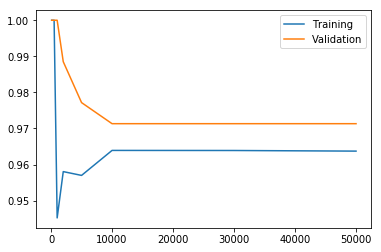

In [45]:
#7ci) Model the class conditional probabilities as Gaussians with different means and same covariance

#Given multiple covariance matrices it will calculate the mean covariance
def covar_mean(sigmas, training):
    result = np.zeros((sigmas[0].shape[0],sigmas[0].shape[0]))
    for sigma in sigmas:
        np.add(result, sigma, result)
    result = result / float(len(training))
    return result

def LDA(data,labels,means,covars):
    post = None
    sigma = covar_mean(covars, data)
    for i in range(len(np.unique(labels))):
        if i == 0:
            post = multivariate_normal.logpdf(x = data,
                    mean = means[i], cov = sigma, allow_singular = True)
            continue
        else:
            postProbs = multivariate_normal.logpdf(x = data,
                    mean = means[i], cov = sigma, allow_singular = True)
        post = np.dstack((post, postProbs))
    return np.argmax(post, axis = 2).reshape(-1)

def QDA(data,labels,means,covars):
    post = None
    for i in range(len(np.unique(labels))):
        if i == 0:
            post = multivariate_normal.logpdf(x = data,
                    mean = means[i], cov = covars[i], allow_singular = True)
            continue
        else:
            postProbs = multivariate_normal.logpdf(x = data,
                    mean = means[i], cov = covars[i], allow_singular = True)
        post = np.dstack((post, postProbs))
    return np.argmax(post, axis = 2).reshape(-1)
            
def classify(c, trData, trLabels, valData, valLabels, origTrain, origLabels, Lda):
    ### Classfies based on the given criteria, if c given then graphs that specefic
    ### number's plot.
    sizes = [100,200,500,1000,2000,5000,10000,30000,50000]
    trainingScores = []
    validationScores = []
    for num in sizes:
        if Lda:
            MnistMeans, MnistCov = fit_gauss_dist(origTrain,origLabels, norm = True)
            predictionsTr = LDA(trData[:num],trLabels[:num],MnistMeans,MnistCov)
            predictionsVal = LDA(valData[:num],valLabels[:num],MnistMeans,MnistCov)
            if c:
                indexTr = np.where(predictionsTr == c)[0]
                indexVal = np.where(predictionsVal == c)[0]
                scoreTr = accuracy(trLabels[indexTr],predictionsTr[indexTr])
                scoreVal = accuracy(valLabels[indexVal],predictionsVal[indexVal])
            else:
                scoreTr = accuracy(trLabels[:num],predictionsTr)
                scoreVal = accuracy(valLabels[:num],predictionsVal)
        else:
            MnistMeans, MnistCov = fit_gauss_dist(origTrain, origLabels, norm = True)
            predictionsTr = QDA(trData[:num],trLabels[:num],MnistMeans,MnistCov)
            predictionsVal = QDA(valData[:num],valLabels[:num],MnistMeans,MnistCov)
            if c:
                indexTr = np.where(predictionsTr == c)[0]
                indexVal = np.where(predictionsVal == c)[0]
                scoreTr = accuracy(trLabels[indexTr],predictionsTr[indexTr])
                scoreVal = accuracy(valLabels[indexVal],predictionsVal[indexVal])
            else:
                scoreTr = accuracy(trLabels[:num],predictionsTr)
                scoreVal = accuracy(valLabels[:num],predictionsVal)
                
        trainingScores.append(scoreTr)
        validationScores.append(scoreVal)
    plt.plot(sizes, trainingScores, label = "Training")
    plt.plot(sizes, validationScores, label = "Validation")
    plt.legend()
    plt.show()
          

def accuracy(labels, predictions):
    return np.sum(predictions.reshape(-1) == labels.reshape(-1))/len(predictions)

#classify(MnistTrdata,MnistTrlabel,MnistValdata,MnistVallabel,mnist_training,mnist_labels,Lda = True) 
classify(9,MnistTrdata,MnistTrlabel,MnistValdata,MnistVallabel,
         mnist_training,mnist_labels,Lda = False)
#MnistMeans, MnistCov = fit_gauss_dist(mnist_training,mnist_labels,norm = True)
#LDA(MnistTrdata,MnistTrlabel,MnistMeans,MnistCov,100)
    

In [39]:
#spam QDA work
spamMeans, spamCov = fit_gauss_dist(spam_training, spam_labels, norm = False)
predictions = LDA(spam_test,spam_labels,spamMeans,spamCov)
results_to_csv(predictions)

In [30]:
#setting up the kaggle submission for Mnist-QDA
MnistMeans, MnistCov = fit_gauss_dist(mnist_training, mnist_labels, norm = True)
predictions = LDA(mnist_test, mnist_labels, MnistMeans, MnistCov)
results_to_csv(predictions)


In [25]:
#submission to kaggle code
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission.csv', index_label='Id')

